- 20 runs of each per testing cycle
- Start 1 thread through to 128 to see peak and drop off
- Show time taken for thread count
- Then increase unit size once optimal amount of threads is found to see difference of serial and parallel
- Show accuracy for unit size

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

def generateDataFrames(filename):
    times = [[],[],[]]
    calculations = [[],[],[]]

    with open(filename, 'r') as file:
        for line in file:
            pairs = line.strip().split()
            for idx, pair in enumerate(pairs):
                time, calc = map(float, pair.split(':'))
                times[idx % 3].append(time)
                calculations[idx % 3].append(calc)

    df = pd.DataFrame({
        'time_serial': times[0],
        'time_monte_carlo': times[1],
        'time_circle_area': times[2],
        'calc_serial': calculations[0],
        'calc_monte_carlo': calculations[1],
        'calc_circle_area': calculations[2]
    })

    return df

def filterData(df):
    for time_col in ['time_serial', 'time_monte_carlo', 'time_circle_area']:
        Q1 = df[time_col].quantile(0.25)
        Q3 = df[time_col].quantile(0.75)
        IQR = Q3 - Q1

        # Filter out outliers using the IQR rule
        filtered_data = df[time_col][~((df[time_col] < (Q1 - 1.5 * IQR)) | (df[time_col] > (Q3 + 1.5 * IQR)))]

def createBoxPlot(data, cols):
    for col in cols:
        plt.boxplot(data)
        plt.title(f"Execution Time for {col} (Filtered)")
        plt.ylabel("Time (seconds)")
        plt.show()

def plot_execution_times(pairs):
    # Sort the pairs by the number of cores
    pairs.sort(key=lambda x: int(x[0]))

    # Split the pairs into two lists: one for cores, one for times
    cores = [int(pair[0]) for pair in pairs]
    times = [pair[1] for pair in pairs]

    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.plot(cores, times, color='black')
    
    # Add labels and title
    plt.xlabel('Number of Cores')
    plt.ylabel('Average Execution Time (seconds)')
    plt.title('Execution Time vs Number of Cores')
    
    # Show the chart
    plt.show()


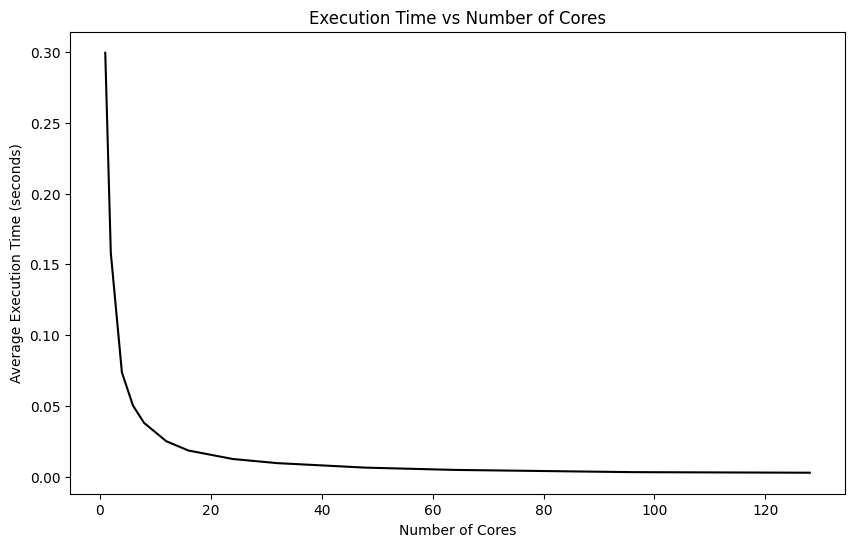

In [10]:
folder_path = '100-million-results'
pairs = []

for filename in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, filename)):
        df = generateDataFrames("100-million-results/" + filename)
        filterData(df)
        pair = (filename.split(".")[0], df["time_circle_area"].mean())
        pairs.append(pair)

plot_execution_times(pairs)
        

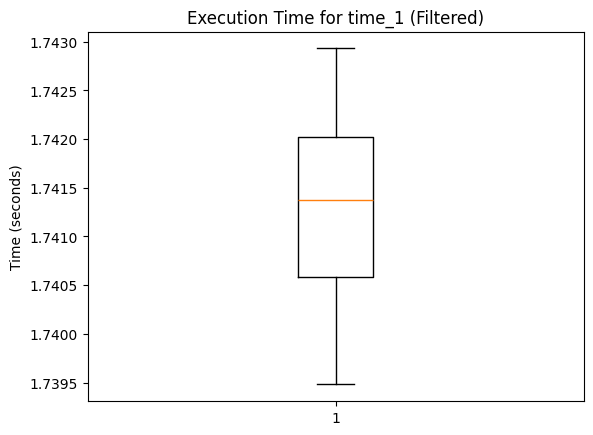

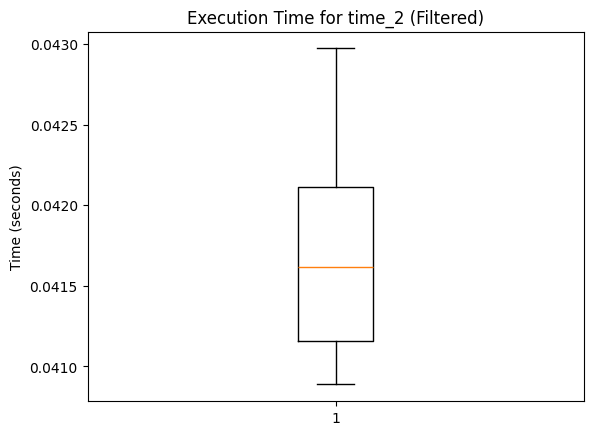

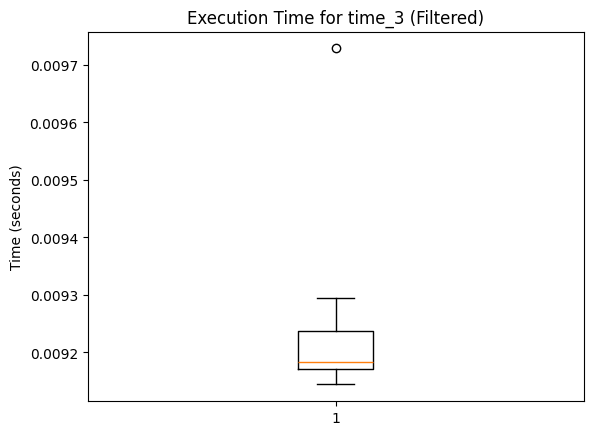

In [2]:
# Loop through time columns to filter out outliers and plot
for time_col in ['time_1', 'time_2', 'time_3']:
    Q1 = df[time_col].quantile(0.25)
    Q3 = df[time_col].quantile(0.75)
    IQR = Q3 - Q1

    # Filter out outliers using the IQR rule
    filtered_data = df[time_col][~((df[time_col] < (Q1 - 1.5 * IQR)) | (df[time_col] > (Q3 + 1.5 * IQR)))]

    # Plot the boxplot for the filtered data
    plt.boxplot(filtered_data)
    plt.title(f"Execution Time for {time_col} (Filtered)")
    plt.ylabel("Time (seconds)")
    plt.show()

In [ ]:
accuracy = []